In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
from matplotlib import gridspec
import time

In [2]:
from matplotlib import rc
rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

mpl.rcParams.update({'font.size': 19})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
hep.set_style("CMS") 

<ipython-input-2-99a23e5daf14>:21: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style("CMS")


In [3]:
qedcorr_rapgap = {}
qedcorr_djangoh = {} 

with open('outputfiles/QEDCorrections_Rapgap.npy' , 'rb') as f:
    qedcorr_rapgap['pT'] = np.load(f)
    qedcorr_rapgap['eta'] = np.load(f)
    qedcorr_rapgap['qT'] = np.load(f)
    qedcorr_rapgap['dphi'] = np.load(f)
with open('outputfiles/QEDCorrections_Djangoh.npy' , 'rb') as f:
    qedcorr_djangoh['pT'] = np.load(f)
    qedcorr_djangoh['eta'] = np.load(f)
    qedcorr_djangoh['qT'] = np.load(f)
    qedcorr_djangoh['dphi'] = np.load(f)

In [4]:
bins = {}

#jet pt
bins[0] = np.logspace(np.log10(10),np.log10(100),7)

#jet eta
bins[1] = np.linspace(-1,2.5,6)

#dphi
bins[2] = np.logspace(np.log10(0.03),np.log10(np.pi/2.0),9) - 0.03
bins[2] = bins[2][1:]
bins[2][0] = 0.0

#qt
bins[3] = np.logspace(np.log10(0.03),np.log10(3.03),9) - 0.03
bins[3] = bins[3][1:]
bins[3][0] = 0.0

In [5]:
mc = pd.read_pickle("/data1/bpnachman/july16/datasets/Django_nominal.pkl")
theta0_G = mc[['genjet_pt','genjet_eta','genjet_dphi','genjet_qtnorm']].to_numpy()
weights_MC = mc['wgt']
pass_fid = np.array(mc['pass_fiducial'])

truthval = {}
truthval["pT"],_=np.histogram(theta0_G[pass_fid==1][:,0],bins=bins[0],weights=weights_MC[pass_fid==1],density=True)
truthval["qT"],_=np.histogram(theta0_G[pass_fid==1][:,3],bins=bins[3],weights=weights_MC[pass_fid==1],density=True)
truthval["dphi"],_=np.histogram(theta0_G[pass_fid==1][:,2],bins=bins[2],weights=weights_MC[pass_fid==1],density=True)
truthval["eta"],_=np.histogram(theta0_G[pass_fid==1][:,1],bins=bins[1],weights=weights_MC[pass_fid==1],density=True)

del mc,theta0_G,weights_MC,pass_fid
gc.collect()

mc = pd.read_pickle("/data1/bpnachman/july16/datasets/Rapgap_nominal.pkl")
theta0_G = mc[['genjet_pt','genjet_eta','genjet_dphi','genjet_qtnorm']].to_numpy()
weights_MC = mc['wgt']
pass_fid = np.array(mc['pass_fiducial'])

truthval2 = {}
truthval2["pT"],_=np.histogram(theta0_G[pass_fid==1][:,0],bins=bins[0],weights=weights_MC[pass_fid==1],density=True)
truthval2["qT"],_=np.histogram(theta0_G[pass_fid==1][:,3],bins=bins[3],weights=weights_MC[pass_fid==1],density=True)
truthval2["dphi"],_=np.histogram(theta0_G[pass_fid==1][:,2],bins=bins[2],weights=weights_MC[pass_fid==1],density=True)
truthval2["eta"],_=np.histogram(theta0_G[pass_fid==1][:,1],bins=bins[1],weights=weights_MC[pass_fid==1],density=True)

del mc,theta0_G,weights_MC,pass_fid
gc.collect()

0

<Figure size 720x720 with 0 Axes>

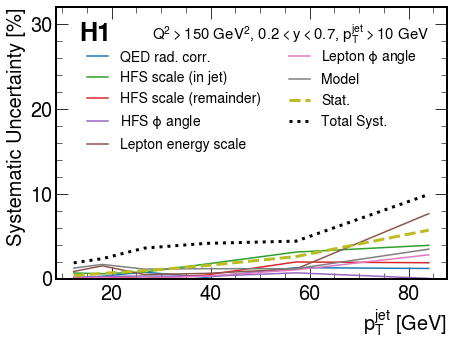

<Figure size 720x720 with 0 Axes>

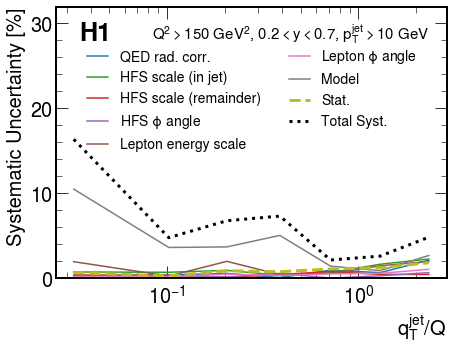

<Figure size 720x720 with 0 Axes>

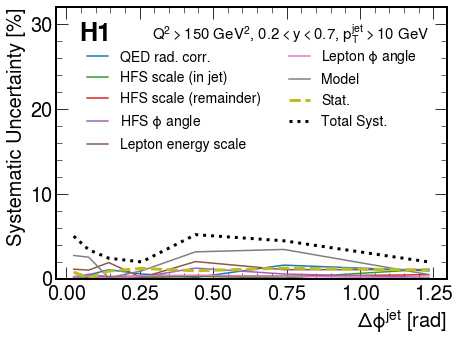

<Figure size 720x720 with 0 Axes>

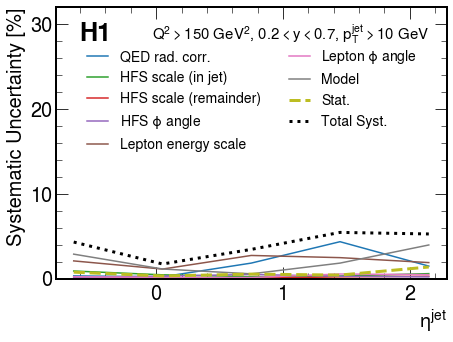

In [6]:
symbol = {}
symbol['dphi'] = '$\Delta\phi^{jet}$ [rad]'
symbol['eta'] = '$\eta^{jet}$'
symbol['qT']  = '$q_{T}^{jet}/Q$'
symbol['pT'] = '$p_{T}^{jet}$ [GeV]'

bins = {}

#jet pt
bins['pT'] = np.logspace(np.log10(10),np.log10(100),7)

#jet eta
bins['eta'] = np.linspace(-1,2.5,6)

#dphi
bins['dphi'] = np.logspace(np.log10(0.03),np.log10(np.pi/2.0),9) - 0.03
bins['dphi'] = bins['dphi'][1:]
bins['dphi'][0] = 0.0

#qt
bins['qT'] = np.logspace(np.log10(0.03),np.log10(3.03),9) - 0.03
bins['qT'] = bins['qT'][1:]
bins['qT'][0] = 0.0

for obs in ['pT','qT','dphi','eta']:

    nominal_R = []
    sys0_R = []
    sys1_R = []
    sys5_R = []
    sys7_R = []
    sys11_R = []
    
    nominal_D = []
    sys0_D = []
    sys1_D = []
    sys5_D = []
    sys7_D = []
    sys11_D = []
    
    for i in range(8):
        if (i==0):
            nominal_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
            
            nominal_D += [np.load("inputfiles/fullscan/storage_files/Django_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
        else:
            nominal_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
            
            nominal_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
            pass
        pass
    
    #non-closure
    nc = np.load("inputfiles/nonclosure/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4_NC.npy")
    nc = (nc-truthval[obs])/truthval[obs]
    
    #stat uncert
    nominal_stat = []
    for j in np.concatenate([range(1,30),range(34,45),[46,47,48,49],range(54,66),range(80,86),range(100,106),range(120,126)]):
        nominal_stat += [np.load("inputfiles/fullscan_stat/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4_"+str(j)+".npy")]
        pass

    nominal_stat = nominal_stat[0:64]
    nominal_stat = np.reshape(nominal_stat,[64,1,np.shape(nominal_stat)[-1]])
    nominal_stat = np.median(nominal_stat,axis=1)
    
    fig = plt.figure()
    
    nominal_rap = np.median(nominal_R,axis=0)
    sys0_rap = np.median(sys0_R,axis=0)
    sys1_rap = np.median(sys1_R,axis=0)
    sys5_rap = np.median(sys5_R,axis=0)
    sys7_rap = np.median(sys7_R,axis=0)
    sys11_rap = np.median(sys11_R,axis=0)
    
    #std
    std_nom_R = np.std(nominal_R,axis=0)/np.median(nominal_R,axis=0)
    std_sys0_R = np.std(sys0_R,axis=0)/np.median(sys0_R,axis=0)
    std_sys1_R = np.std(sys1_R,axis=0)/np.median(sys1_R,axis=0)
    std_sys5_R = np.std(sys5_R,axis=0)/np.median(sys5_R,axis=0)
    std_sys7_R = np.std(sys7_R,axis=0)/np.median(sys7_R,axis=0)
    std_sys11_R = np.std(sys11_R,axis=0)/np.median(sys11_R,axis=0)
    std_nom_D = np.std(nominal_D,axis=0)/np.median(nominal_D,axis=0)
    std_sys0_D = np.std(sys0_D,axis=0)/np.median(sys0_D,axis=0)
    std_sys1_D = np.std(sys1_D,axis=0)/np.median(sys1_D,axis=0)
    std_sys5_D = np.std(sys5_D,axis=0)/np.median(sys5_D,axis=0)
    std_sys7_D = np.std(sys7_D,axis=0)/np.median(sys7_D,axis=0)
    std_sys11_D = np.std(sys11_D,axis=0)/np.median(sys11_D,axis=0)
    std = np.mean([std_nom_R,std_sys0_R,std_sys1_R,std_sys5_R,std_sys7_R,std_sys11_R,
                  std_nom_D,std_sys0_D,std_sys1_D,std_sys5_D,std_sys7_D,std_sys11_D],axis=0)
    stat = np.std(nominal_stat,axis=0)/np.mean(nominal_stat,axis=0)
    stat = np.sqrt(abs(stat**2-std**2))
    
    nominal_dj = np.median(nominal_D,axis=0)
    sys0_dj = np.median(sys0_D,axis=0)
    sys1_dj = np.median(sys1_D,axis=0)
    sys5_dj = np.median(sys5_D,axis=0)
    sys7_dj = np.median(sys7_D,axis=0)
    sys11_dj = np.median(sys11_D,axis=0)
    
    myavgR_0 = (nominal_rap - sys0_rap)/nominal_rap
    myavgR_1 = (nominal_rap - sys1_rap)/nominal_rap
    myavgR_5 = (nominal_rap - sys5_rap)/nominal_rap
    myavgR_7 = (nominal_rap - sys7_rap)/nominal_rap
    myavgR_11 = (nominal_rap - sys11_rap)/nominal_rap
    
    myavgD_0 = (nominal_dj - sys0_dj)/nominal_dj
    myavgD_1 = (nominal_dj - sys1_dj)/nominal_dj
    myavgD_5 = (nominal_dj - sys5_dj)/nominal_dj
    myavgD_7 = (nominal_dj - sys7_dj)/nominal_dj
    myavgD_11 = (nominal_dj - sys11_dj)/nominal_dj
    
    myavg_0 = np.mean([myavgR_0,myavgD_0],axis=0)
    myavg_1 = np.mean([myavgR_1,myavgD_1],axis=0)
    myavg_5 = np.mean([myavgR_5,myavgD_5],axis=0)
    myavg_7 = np.mean([myavgR_7,myavgD_7],axis=0)
    myavg_11 = np.mean([myavgR_11,myavgD_11],axis=0)
    
    model_nominal = (nominal_rap-nominal_dj)/nominal_rap
    model_0 = (sys0_rap-sys0_dj)/sys0_rap
    model_1 = (sys1_rap-sys1_dj)/sys1_rap
    model_5 = (sys5_rap-sys5_dj)/sys5_rap
    model_7 = (sys7_rap-sys7_dj)/sys7_rap
    model_11 = (sys11_rap-sys11_dj)/sys11_rap
    model = np.mean([model_nominal,model_0,model_1,model_5,model_7,model_11],axis=0)
    qed = (qedcorr_rapgap[obs]-qedcorr_djangoh[obs])/qedcorr_rapgap[obs]
    
    fig = plt.figure(figsize=(7, 5)) 
    gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    xvals = 0.5*(bins[obs][0:-1]+bins[obs][1:])
    
    plt.plot(xvals, 100*abs(qed),label="QED rad. corr.",color="tab:blue")
    #plt.plot(xvals, 100*abs(nc),label="Non-closure",color="tab:orange")
    plt.plot(xvals,100*abs(myavg_0),label="HFS scale (in jet)",color="tab:green")
    plt.plot(xvals,100*abs(myavg_1),label="HFS scale (remainder)",color="tab:red")
    plt.plot(xvals,100*abs(myavg_5),label="HFS $\phi$ angle",color="tab:purple")
    plt.plot(xvals,100*abs(myavg_7),label="Lepton energy scale",color="tab:brown")
    plt.plot(xvals,100*abs(myavg_11),label="Lepton $\phi$ angle",color="tab:pink")
    plt.plot(xvals,100*abs(model),label="Model",color="tab:gray")
    plt.plot(xvals,100*abs(stat),label="Stat.",ls="--",lw=3,color="tab:olive")
    
    total = np.sqrt(nc**2+qed**2+myavg_0**2+myavg_1**2+myavg_5**2+myavg_7**2+myavg_11**2+model**2)
    plt.plot(xvals,100*abs(total),ls=":",color="black",label="Total Syst.",lw=3)
    
    plt.legend(loc='upper right',fontsize=14,ncol=2,bbox_to_anchor=(0.96, 0.9))
    plt.ylim([0,32])
    plt.xlabel(symbol[obs],fontsize=20)
    plt.ylabel("Systematic Uncertainty [%]",fontsize=20)
    
    if obs == 'qT':
        plt.xscale("log")
    
    plt.text(0.1, 1.15-0.25,'H1', horizontalalignment='center', verticalalignment='center', transform = ax0.transAxes, fontsize=25, fontweight='bold')
    plt.text(0.6, 1.15-0.25,'$Q^{2}>$150 GeV$^{2}$, $0.2<y<0.7$, $p_{T}^{jet}>10$ GeV', horizontalalignment='center',verticalalignment='center', transform = ax0.transAxes, fontsize=15)
    
    myobs_map = {}
    myobs_map['pT'] = 'jetpt'
    myobs_map['eta'] = 'jeteta'
    myobs_map['qT'] = 'qt'
    myobs_map['dphi'] = 'dphi'
    
    fig.savefig('figures/TotalUncerts_%s_FIXED.pdf'%myobs_map[obs],bbox_inches='tight')
    
    #save results
    with open('outputfiles/ResultwithSystematicUncertainties_%s_ensemble_FIXED.npy'%(myobs_map[obs]), 'wb') as f:
        np.save(f,0.5*(bins[obs][0:-1]+bins[obs][1:]))
        np.save(f,np.mean([nominal_rap,nominal_dj],axis=0))
        np.save(f,0.5*abs(bins[obs][0:-1]-bins[obs][1:]))
        np.save(f, total)
        np.save(f, stat)
        np.save(f,abs(qed))
        np.save(f,abs(myavg_0))
        np.save(f,abs(myavg_1))
        np.save(f,abs(myavg_5))
        np.save(f,abs(myavg_7))
        np.save(f,abs(myavg_11))
        np.save(f,abs(model))

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


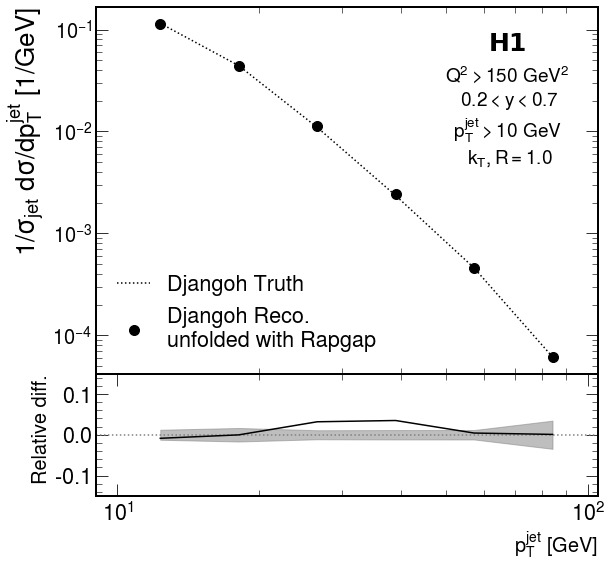

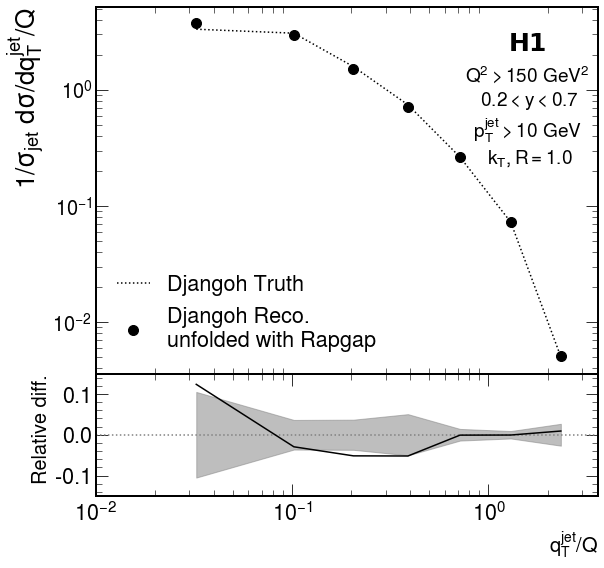

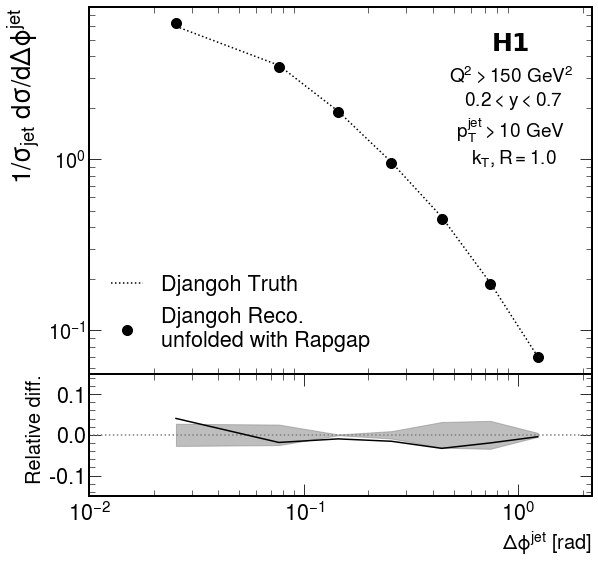

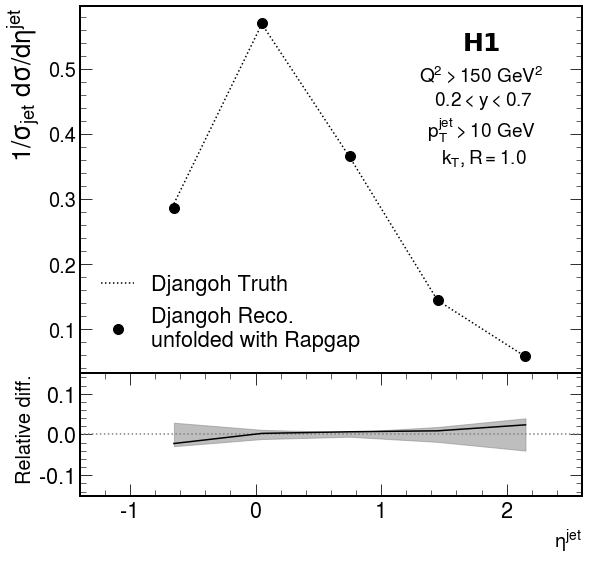

In [7]:
symbol = {}
symbol['dphi'] = '$\Delta\phi^{jet}$'
symbol['eta'] = '$\eta^{jet}$'
symbol['qT']  = '$q_{T}^{jet}/Q$'
symbol['pT'] = '$p_{T}^{jet}$'

bins = {}

#jet pt
bins['pT'] = np.logspace(np.log10(10),np.log10(100),7)

#jet eta
bins['eta'] = np.linspace(-1,2.5,6)

#dphi
bins['dphi'] = np.logspace(np.log10(0.03),np.log10(np.pi/2.0),9) - 0.03
bins['dphi'] = bins['dphi'][1:]
bins['dphi'][0] = 0.0

#qt
bins['qT'] = np.logspace(np.log10(0.03),np.log10(3.03),9) - 0.03
bins['qT'] = bins['qT'][1:]
bins['qT'][0] = 0.0

for obs in ['pT','qT','dphi','eta']:

    nominal_R = []
    sys0_R = []
    sys1_R = []
    sys5_R = []
    sys7_R = []
    sys11_R = []
    
    nominal_D = []
    sys0_D = []
    sys1_D = []
    sys5_D = []
    sys7_D = []
    sys11_D = []
    
    for i in range(8):
        if (i==0):
            nominal_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
            
            nominal_D += [np.load("inputfiles/fullscan/storage_files/Django_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
        else:
            nominal_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
            
            nominal_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
            pass
        pass
    
    #non-closure
    nc_in = np.load("inputfiles/nonclosure/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4_NC.npy")
    nc = (nc_in-truthval[obs])/truthval[obs]
    
    #nc2 = np.load("/home/bpnachman/disjets/nonclosure/storage_files/Django_nominaln_Omni_step2_"+obs+"_iteration4_NC.npy")
    #nc2 = (nc2-truthval2[obs])/truthval2[obs]
    
    #stat uncert
    nominal_stat = []
    for j in np.concatenate([range(1,30),range(34,45),[46,47,48,49],range(54,66),range(80,86),range(100,106),range(120,126)]):
        nominal_stat += [np.load("inputfiles/fullscan_stat/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4_"+str(j)+".npy")]
        pass

    nominal_stat = nominal_stat[0:64]
    nominal_stat = np.reshape(nominal_stat,[64,1,np.shape(nominal_stat)[-1]])
    nominal_stat = np.median(nominal_stat,axis=1)
    
    nominal_rap = np.median(nominal_R,axis=0)
    sys0_rap = np.median(sys0_R,axis=0)
    sys1_rap = np.median(sys1_R,axis=0)
    sys5_rap = np.median(sys5_R,axis=0)
    sys7_rap = np.median(sys7_R,axis=0)
    sys11_rap = np.median(sys11_R,axis=0)
    
    #std
    std_nom_R = np.std(nominal_R,axis=0)/np.median(nominal_R,axis=0)
    std_sys0_R = np.std(sys0_R,axis=0)/np.median(sys0_R,axis=0)
    std_sys1_R = np.std(sys1_R,axis=0)/np.median(sys1_R,axis=0)
    std_sys5_R = np.std(sys5_R,axis=0)/np.median(sys5_R,axis=0)
    std_sys7_R = np.std(sys7_R,axis=0)/np.median(sys7_R,axis=0)
    std_sys11_R = np.std(sys11_R,axis=0)/np.median(sys11_R,axis=0)
    std_nom_D = np.std(nominal_D,axis=0)/np.median(nominal_D,axis=0)
    std_sys0_D = np.std(sys0_D,axis=0)/np.median(sys0_D,axis=0)
    std_sys1_D = np.std(sys1_D,axis=0)/np.median(sys1_D,axis=0)
    std_sys5_D = np.std(sys5_D,axis=0)/np.median(sys5_D,axis=0)
    std_sys7_D = np.std(sys7_D,axis=0)/np.median(sys7_D,axis=0)
    std_sys11_D = np.std(sys11_D,axis=0)/np.median(sys11_D,axis=0)
    std = np.mean([std_nom_R,std_sys0_R,std_sys1_R,std_sys5_R,std_sys7_R,std_sys11_R,
                  std_nom_D,std_sys0_D,std_sys1_D,std_sys5_D,std_sys7_D,std_sys11_D],axis=0)
    stat = np.std(nominal_stat,axis=0)/np.mean(nominal_stat,axis=0)
    stat = np.sqrt(abs(stat**2-std**2))
    
    nominal_dj = np.median(nominal_D,axis=0)
    sys0_dj = np.median(sys0_D,axis=0)
    sys1_dj = np.median(sys1_D,axis=0)
    sys5_dj = np.median(sys5_D,axis=0)
    sys7_dj = np.median(sys7_D,axis=0)
    sys11_dj = np.median(sys11_D,axis=0)
    
    myavgR_0 = (nominal_rap - sys0_rap)/nominal_rap
    myavgR_1 = (nominal_rap - sys1_rap)/nominal_rap
    myavgR_5 = (nominal_rap - sys5_rap)/nominal_rap
    myavgR_7 = (nominal_rap - sys7_rap)/nominal_rap
    myavgR_11 = (nominal_rap - sys11_rap)/nominal_rap
    
    myavgD_0 = (nominal_dj - sys0_dj)/nominal_dj
    myavgD_1 = (nominal_dj - sys1_dj)/nominal_dj
    myavgD_5 = (nominal_dj - sys5_dj)/nominal_dj
    myavgD_7 = (nominal_dj - sys7_dj)/nominal_dj
    myavgD_11 = (nominal_dj - sys11_dj)/nominal_dj
    
    myavg_0 = np.mean([myavgR_0,myavgD_0],axis=0)
    myavg_1 = np.mean([myavgR_1,myavgD_1],axis=0)
    myavg_5 = np.mean([myavgR_5,myavgD_5],axis=0)
    myavg_7 = np.mean([myavgR_7,myavgD_7],axis=0)
    myavg_11 = np.mean([myavgR_11,myavgD_11],axis=0)
    
    model_nominal = (nominal_rap-nominal_dj)/nominal_rap
    model_0 = (sys0_rap-sys0_dj)/sys0_rap
    model_1 = (sys1_rap-sys1_dj)/sys1_rap
    model_5 = (sys5_rap-sys5_dj)/sys5_rap
    model_7 = (sys7_rap-sys7_dj)/sys7_rap
    model_11 = (sys11_rap-sys11_dj)/sys11_rap
    model = np.mean([model_nominal,model_0,model_1,model_5,model_7,model_11],axis=0)
    qed = (qedcorr_rapgap[obs]-qedcorr_djangoh[obs])/qedcorr_rapgap[obs]
    
    fig = plt.figure(figsize=(9, 9))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    gs.update(wspace=0.025, hspace=0.) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=0)
    plt.yticks(fontsize=20)
    ax0.minorticks_on()
    
    xvals = 0.5*(bins[obs][0:-1]+bins[obs][1:])
    plt.plot(xvals, truthval[obs],label="Djangoh Truth",color="black",ls=":")
    plt.plot(xvals, nc_in,label="Djangoh Reco.\nunfolded with Rapgap",marker='o',color="black",ls="",ms=10)
    plt.legend(frameon=False,loc="lower left")
    
    if 'dphi' in obs:
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim([0.01,2.2])

    if 'eta' in obs:
        plt.xlim([-1.4,2.6])

    if 'pT' in obs:
        plt.xscale('log')
        plt.yscale('log')
        plt.xlim([9,105])

    if 'qT' in obs:
        plt.xscale('log')
        plt.yscale('log')
        plt.xlim([0.01,3.6])
    
    #plt.text(0.1, 1.15-0.25,'H1', horizontalalignment='center', verticalalignment='center', transform = ax0.transAxes, fontsize=25, fontweight='bold')
    #plt.text(0.6, 1.15-0.25,'$Q^{2}>$150 GeV$^{2}$, $0.2<y<0.7$, $p_{T}^{jet}>10$ GeV', horizontalalignment='center',verticalalignment='center', transform = ax0.transAxes, fontsize=15)
    
    plt.ylabel(r'$1/\sigma_\mathrm{jet}$ $\mathrm{d}\sigma/\mathrm{d}$%s'%symbol[obs])
    if 'pT' in obs:
         plt.ylabel(r'$1/\sigma_\mathrm{jet}$ $\mathrm{d}\sigma/\mathrm{d}$%s [1/GeV]'%symbol[obs])
    
    xposition = 0.2
    if 'pT' in obs:
        xposition = 0.82
    if 'qT' in obs:
        xposition = 0.86
    if 'eta' in obs:
        xposition = 0.8
    if 'dphi' in obs:
        xposition  = 0.84
    
    ax0.set_xticks([])
    plt.text(xposition, 0.9,r'H1',
             horizontalalignment='center',multialignment='left',fontfamily="san-serif",
             verticalalignment='center',transform = ax0.transAxes, fontsize=25, fontweight='bold')
    
    plt.text(xposition, 0.7,'$Q^{2}>150$ $\mathrm{GeV}^{2}$ \n $0.2<y<0.7$ \n $p_\mathrm{T}^\mathrm{jet}>10$ $\mathrm{GeV}$  \n $k_\mathrm{T}, R=1.0$',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=19)
    
    ax1 = plt.subplot(gs[1])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.tick_params(direction="in",which="both")
    ax1.minorticks_on()
    plt.xlabel(symbol[obs],fontsize=20)
    
    if 'dphi' in obs:
        plt.xscale('log')
        plt.xlim([0.01,2.2])

    if 'eta' in obs:
        plt.xlim([-1.4,2.6])

    if 'pT' in obs:
        plt.xscale('log')
        plt.xlim([9,105])

    if 'qT' in obs:
        plt.xscale('log')
        plt.xlim([0.01,3.6])
    
    if 'pT' in obs:
        plt.xlabel(symbol[obs]+' $\mathrm{[GeV]}$')
    if 'dphi' in obs:
        plt.xlabel(symbol[obs]+' $\mathrm{[rad]}$')
    if 'eta' in obs or 'qT' in obs:
        plt.xlabel(symbol[obs])
    
    plt.axhline(0,ls=":",color="grey")
    plt.fill_between(xvals,-1*abs(model),abs(model),label="Model",color="tab:gray",alpha=0.5)
    plt.plot(xvals, nc,label="Non-closure cross-check",color="black")
    plt.ylim([-0.15,0.15])
    plt.ylabel("Relative diff.",fontsize=20)
    
    fig.savefig('figures/NC_%s_FIXED.pdf'%myobs_map[obs],bbox_inches='tight')

In [8]:
symbol = {}
symbol['dphi'] = '$\Delta\phi^{jet}$'
symbol['eta'] = '$\eta^{jet}$'
symbol['qT']  = '$q_{T}^{jet}/Q$'
symbol['pT'] = '$p_{T}^{jet}$'

bins = {}

#jet pt
bins['pT'] = np.logspace(np.log10(10),np.log10(100),7)

#jet eta
bins['eta'] = np.linspace(-1,2.5,6)

#dphi
bins['dphi'] = np.logspace(np.log10(0.03),np.log10(np.pi/2.0),9) - 0.03
bins['dphi'] = bins['dphi'][1:]
bins['dphi'][0] = 0.0

#qt
bins['qT'] = np.logspace(np.log10(0.03),np.log10(3.03),9) - 0.03
bins['qT'] = bins['qT'][1:]
bins['qT'][0] = 0.0

unfolded_vals = {}

obs_counter = 0
for obs in ['pT','eta','dphi','qT']:

    nominal_R = []
    sys0_R = []
    sys1_R = []
    sys5_R = []
    sys7_R = []
    sys11_R = []
    
    nominal_D = []
    sys0_D = []
    sys1_D = []
    sys5_D = []
    sys7_D = []
    sys11_D = []
    
    for i in range(8):
        if (i==0):
            nominal_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_R += [np.load("inputfiles/fullscan/storage_files/Rapgap_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
            
            nominal_D += [np.load("inputfiles/fullscan/storage_files/Django_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_D += [np.load("inputfiles/fullscan/storage_files/Django_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
        else:
            nominal_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_R += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Rapgap_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
            
            nominal_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_nominaln_Omni_step2_"+obs+"_iteration4.npy")]
            sys0_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_0n_Omni_step2_"+obs+"_iteration4.npy")]
            sys1_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_1n_Omni_step2_"+obs+"_iteration4.npy")]
            sys5_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_5n_Omni_step2_"+obs+"_iteration4.npy")]
            sys7_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_7n_Omni_step2_"+obs+"_iteration4.npy")]
            sys11_D += [np.load("inputfiles/fullscan"+str(i+1)+"/storage_files/Django_sys_11n_Omni_step2_"+obs+"_iteration4.npy")]
            pass
        pass
    
    #non-closure
    nc_in = np.load("inputfiles/nonclosure/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4_NC.npy")
    nc = (nc_in-truthval[obs])/truthval[obs]
    
    #nc2 = np.load("/home/bpnachman/disjets/nonclosure/storage_files/Django_nominaln_Omni_step2_"+obs+"_iteration4_NC.npy")
    #nc2 = (nc2-truthval2[obs])/truthval2[obs]
    
    #stat uncert
    nominal_stat = []
    strap_counter = 0
    for j in np.concatenate([range(1,30),range(34,45),[46,47,48,49],range(54,66),range(80,86),range(100,106),range(120,126)]):
        nominal_stat += [np.load("inputfiles/fullscan_stat/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4_"+str(j)+".npy")]
        pass
        unfolded_vals[strap_counter,obs_counter]=np.load("inputfiles/fullscan_stat/storage_files/Rapgap_nominaln_Omni_step2_"+obs+"_iteration4_"+str(j)+".npy")
        strap_counter+=1
    obs_counter+=1

    nominal_stat = nominal_stat[0:64]
    nominal_stat = np.reshape(nominal_stat,[64,1,np.shape(nominal_stat)[-1]])
    nominal_stat = np.median(nominal_stat,axis=1)
    
    nominal_rap = np.median(nominal_R,axis=0)
    sys0_rap = np.median(sys0_R,axis=0)
    sys1_rap = np.median(sys1_R,axis=0)
    sys5_rap = np.median(sys5_R,axis=0)
    sys7_rap = np.median(sys7_R,axis=0)
    sys11_rap = np.median(sys11_R,axis=0)
    
    #std
    std_nom_R = np.std(nominal_R,axis=0)/np.median(nominal_R,axis=0)
    std_sys0_R = np.std(sys0_R,axis=0)/np.median(sys0_R,axis=0)
    std_sys1_R = np.std(sys1_R,axis=0)/np.median(sys1_R,axis=0)
    std_sys5_R = np.std(sys5_R,axis=0)/np.median(sys5_R,axis=0)
    std_sys7_R = np.std(sys7_R,axis=0)/np.median(sys7_R,axis=0)
    std_sys11_R = np.std(sys11_R,axis=0)/np.median(sys11_R,axis=0)
    std_nom_D = np.std(nominal_D,axis=0)/np.median(nominal_D,axis=0)
    std_sys0_D = np.std(sys0_D,axis=0)/np.median(sys0_D,axis=0)
    std_sys1_D = np.std(sys1_D,axis=0)/np.median(sys1_D,axis=0)
    std_sys5_D = np.std(sys5_D,axis=0)/np.median(sys5_D,axis=0)
    std_sys7_D = np.std(sys7_D,axis=0)/np.median(sys7_D,axis=0)
    std_sys11_D = np.std(sys11_D,axis=0)/np.median(sys11_D,axis=0)
    std = np.mean([std_nom_R,std_sys0_R,std_sys1_R,std_sys5_R,std_sys7_R,std_sys11_R,
                  std_nom_D,std_sys0_D,std_sys1_D,std_sys5_D,std_sys7_D,std_sys11_D],axis=0)
    stat = np.std(nominal_stat,axis=0)/np.mean(nominal_stat,axis=0)
    stat = np.sqrt(abs(stat**2-std**2))
    
    
firststrap = np.concatenate([unfolded_vals[0,0],unfolded_vals[0,1],unfolded_vals[0,2],unfolded_vals[0,3]])
cov_mat = np.zeros([len(firststrap),len(firststrap)])
for i in range(len(firststrap)):
    for j in range(len(firststrap)):
        #Stat. uncert
        EX = np.mean(np.array([np.concatenate([unfolded_vals[ii,0],unfolded_vals[ii,1],unfolded_vals[ii,2],unfolded_vals[ii,3]]) for ii in range(1,strap_counter)])[:,i])
        EY = np.mean(np.array([np.concatenate([unfolded_vals[ii,0],unfolded_vals[ii,1],unfolded_vals[ii,2],unfolded_vals[ii,3]]) for ii in range(1,strap_counter)])[:,j])
        EXY = np.mean(np.array([np.concatenate([unfolded_vals[ii,0],unfolded_vals[ii,1],unfolded_vals[ii,2],unfolded_vals[ii,3]]) for ii in range(1,strap_counter)])[:,i]*np.array([np.concatenate([unfolded_vals[ii,0],unfolded_vals[ii,1],unfolded_vals[ii,2],unfolded_vals[ii,3]]) for ii in range(1,strap_counter)])[:,j])
        cov_mat[i,j]+=EXY-EX*EY
            
cov_mat = np.array(cov_mat)
cor_mat = cov_mat.copy()
for i in range(len(firststrap)):
    for j in range(len(firststrap)):
        cor_mat[i,j]=cov_mat[i,j]/(cov_mat[i,i]*cov_mat[j,j])**0.5

In [9]:
binss = {}

#jet pt
binss[0] = np.logspace(np.log10(10),np.log10(100),7)

#jet eta
binss[1] = np.linspace(-1,2.5,6)

#dphi
binss[2] = np.logspace(np.log10(0.03),np.log10(np.pi/2.0),9) - 0.03
binss[2] = binss[2][1:]
binss[2][0] = 0.0

#qt
binss[3] = np.logspace(np.log10(0.03),np.log10(3.03),9) - 0.03
binss[3] = binss[3][1:]
binss[3][0] = 0.0

<ipython-input-10-717269c9f0f1>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mylabs)
<ipython-input-10-717269c9f0f1>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(mylabs)


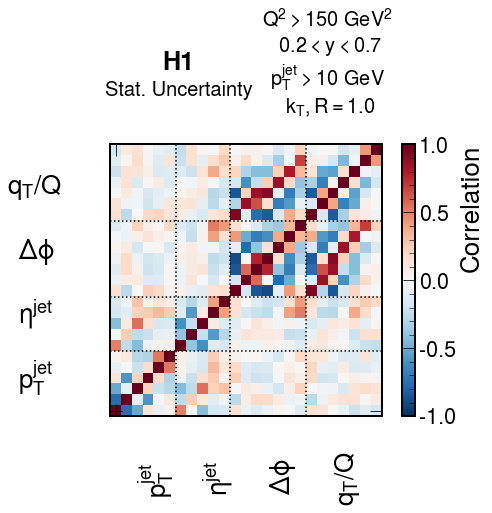

In [10]:
fig = plt.figure(figsize=(7, 5)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.imshow(cor_mat,vmin = -1,vmax = 1,origin='lower',cmap="RdBu_r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Correlation') 

plt.text(0.25, 1.3,'H1',
              horizontalalignment='center',
     verticalalignment='center',
     transform = ax0.transAxes, fontsize=25, fontweight='bold')
plt.text(0.25, 1.2,'Stat. Uncertainty',
              horizontalalignment='center',
     verticalalignment='center',
     transform = ax0.transAxes, fontsize=20)
plt.text(0.8, 1.3,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax0.transAxes, fontsize=20)   

#plt.ylabel("bin")
#plt.xlabel("bin")

plt.text(2,-7,"$p_T^{jet}$", rotation=90)
plt.text(8,-7,"$\eta^{jet}$", rotation=90)
plt.text(14,-7,"$\Delta\phi$", rotation=90)
plt.text(20,-8,"$q_T/Q$", rotation=90)

plt.text(-9,2,"$p_T^{jet}$")
plt.text(-9,8,"$\eta^{jet}$")
plt.text(-9,14,"$\Delta\phi$")
plt.text(-10,20,"$q_T/Q$")

mysum = 0
for i in range(4):
    mysum+=len(unfolded_vals[0,i])
    plt.axvline(mysum-0.5,color="black",ls=":")
    plt.axhline(mysum-0.5,color="black",ls=":")

mylabs = [""]
jj=3
if (j<2):
    for i in range(len(binss[jj])-1):
        mylabs+=["%0.0f" % (0.5*(binss[jj][i]+binss[jj][i+1]))]
else:
    for i in range(len(binss[jj])-1):
        mylabs+=["%0.1f" % (0.5*(binss[jj][i]+binss[jj][i+1]))]
ax0.set_xticklabels(mylabs)
ax0.set_yticklabels(mylabs)
ax0.xaxis.set_major_locator(plt.MaxNLocator(len(binss[jj])))
ax0.yaxis.set_major_locator(plt.MaxNLocator(len(binss[jj])))
plt.xticks([0],[""], rotation='vertical')
plt.yticks([0],[""], rotation='vertical')

fig.savefig('figures/statuncert.pdf',bbox_inches='tight')

#Hepdata
myfile = open("HEPData/data5.yaml",'w')
myfile.write("independent_variables:\n")
myfile.write("- header: {name: bin 1}\n")
myfile.write("  values:\n")
for i in range(np.shape(cor_mat)[0]):
    for j in range(np.shape(cor_mat)[0]):
        myfile.write("  - {value: "+str(i)+"}\n")
myfile.write("- header: {name: bin 2}\n")
myfile.write("  values:\n")
for i in range(np.shape(cor_mat)[0]):
    for j in range(np.shape(cor_mat)[0]):
        myfile.write("  - {value: "+str(j)+"}\n")
myfile.write("dependent_variables:\n")
myfile.write("- header: {name: correlation}\n")
myfile.write("  values:\n")
for i in range(np.shape(cor_mat)[0]):
    for j in range(np.shape(cor_mat)[0]):
        myfile.write("  - {value: "+str(cor_mat[i][j])+"}\n")
myfile.close()